


#### References

https://towardsdatascience.com/step-by-step-guide-building-a-prediction-model-in-python-ac441e8b9e8b



In [65]:
# Data set. Note: We have cleansed the data set to take into account days on which the turbines were inactive.
# This has been determined to be days on which wind speeds were greater than 5mph, however, no power
# was generated. This was deeemed prudent in order to give a more accurate result.

df = pd.read_csv('powerproduction.csv')
col=['speed','power']

# Let's see if the data has loaded correctly. If so, the headings and first 10
# rows will show - yes they do.
print(df.head(n=11))


    speed  power
0   0.000  0.000
1   0.125  0.000
2   0.150  0.000
3   0.225  0.000
4   0.275  0.000
5   0.325  4.331
6   0.400  5.186
7   0.450  3.826
8   0.501  1.048
9   0.526  5.553
10  0.551  6.498


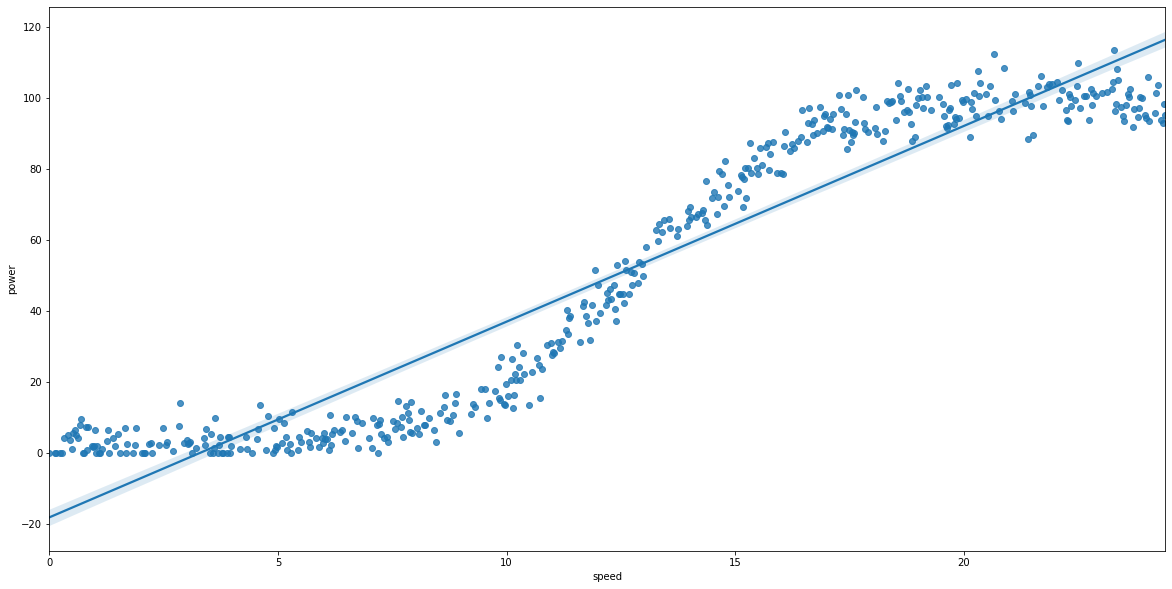

In [70]:
# Take the two variables from our data set.
production = df[["speed", "power"]].dropna()
# Scatter and fit line for just those two variables.
sns.regplot(x="speed", y="power", data=df)


In [71]:
# TRAIN

import sklearn.linear_model as lin

x = production["speed"].to_numpy()
y = production["power"].to_numpy()

x = x.reshape(-1, 1)

model = lin.LinearRegression()
model.fit(x, y)

r = model.score(x, y)
p = [model.intercept_, model.coef_[0]]

In [72]:
# The r value is a measure of how well the line fits the data set.
r

0.9033294610539289

In [73]:
p

[-18.089448231194737, 5.513976519830959]

In [74]:
# Predict. If we have the wind speed (x), how much power would be generated?

def f(x, p):
    return p[0] + x * p[1]

def predict(x, p):
    return f(x, p)

In [75]:
predict(15, p)

64.62019956626965